## Heat Map
indicating laplacian of each point on the drum surface in the scattering domain

In [1]:
import hitdifferentparts
import IPython.display as ipd
import numpy as np
import autograd
import torch
from kymatio import Scattering1D

from torch.autograd import backward
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook

sample from 1/8 of the drum surface, resolution is 0.05

In [2]:
x_alt = []
y_alt = []
for i in range(len(x_sel)):
    if x_sel[i]<=0.5 and y_sel[i]<=0.5 and x_sel[i]<=y_sel[i]:
        x_alt.append(x_sel[i])
        y_alt.append(y_sel[i])
plt.scatter(x_alt,y_alt)

NameError: name 'x_sel' is not defined

In [127]:
print(len(x_sel),len(x_alt),len(y_sel),len(y_alt))

529 78 529 78


529 78 529 78


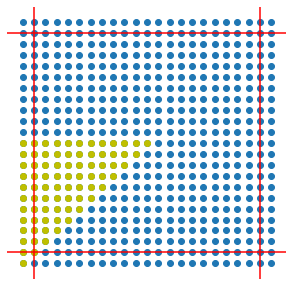

In [3]:
d = 1/20
x = np.linspace(0-d,1+d,21+2)
y = np.linspace(0-d,1+d,21+2)
x_sel = []
y_sel = []
x_alt = []
y_alt = []
for i in x:
    for j in y:
        x_sel.append(i)
        y_sel.append(j)
plt.figure(figsize=(5,5))
#Rectangle((0,0), 1, 1,linestyle='-')

for i in range(len(x_sel)):
    if x_sel[i]<=0.5 and y_sel[i]<=0.5 and x_sel[i]<=y_sel[i]:
        x_alt.append(x_sel[i])
        y_alt.append(y_sel[i])
        
print(len(x_sel),len(x_alt),len(y_sel),len(y_alt))

        
plt.scatter(x_sel,y_sel)
#plt.scatter(x_sel,y_sel,c='k')
plt.scatter(x_alt,y_alt,c='y')
plt.axvline(x=0,color = 'r')
plt.axvline(x=1,color = 'r')
plt.axhline(y=0,color = 'r')
plt.axhline(y=1,color = 'r')
plt.axis('off')
plt.show()
#plt.xlim([0,1])
#plt.ylim([0,1])

dictionary that forms mapping between points that are equivalent to each other.

scattering transform on each point in the set

matrix of scattering transfrom of the entire surface

and then get matrix of laplacian of each point

make coordinate mapping dictionary

In [4]:
x1 = [round(i,2) for i in x]
y1 = [round(i,2) for i in y]

In [5]:
coord_set = {}
# (0.1,0.9) = (0.9,0.1) = {0.9,0.9} = {0.1,0.1}
tot = 0
for i in x1[1:-1]:
    for j in y1[1:-1]:
        tot+=1
        tempset = {(i,j),(round(1-i,2),round(1-j,2)),(round(1-i,2),j),(i,round(1-j,2)),(j,i),(round(1-j,2),round(1-i,2)),(j,round(1-i,2)),(round(1-j,2),i)}
        count = 0
        for coord in tempset:
            if coord not in coord_set.keys():
                count += 1
        if count == len(tempset):
            coord_set[coord] = list(tempset)
print(coord_set.keys(),len(coord_set.keys()))
        

dict_keys([(1.0, 1.0), (1.0, 0.05), (1.0, 0.9), (1.0, 0.85), (1.0, 0.8), (1.0, 0.25), (1.0, 0.7), (1.0, 0.35), (1.0, 0.4), (1.0, 0.55), (0.5, 0.0), (0.95, 0.95), (0.9, 0.05), (0.85, 0.05), (0.8, 0.05), (0.75, 0.05), (0.7, 0.05), (0.65, 0.05), (0.6, 0.05), (0.55, 0.05), (0.95, 0.5), (0.9, 0.9), (0.85, 0.1), (0.8, 0.1), (0.75, 0.1), (0.7, 0.1), (0.65, 0.1), (0.6, 0.1), (0.55, 0.1), (0.9, 0.5), (0.85, 0.85), (0.8, 0.15), (0.75, 0.15), (0.7, 0.15), (0.65, 0.15), (0.6, 0.15), (0.55, 0.15), (0.85, 0.5), (0.8, 0.8), (0.75, 0.2), (0.7, 0.2), (0.65, 0.2), (0.6, 0.2), (0.55, 0.2), (0.8, 0.5), (0.75, 0.75), (0.7, 0.25), (0.65, 0.25), (0.6, 0.25), (0.55, 0.25), (0.75, 0.5), (0.7, 0.7), (0.65, 0.3), (0.6, 0.3), (0.55, 0.3), (0.7, 0.5), (0.65, 0.35), (0.6, 0.35), (0.55, 0.35), (0.65, 0.5), (0.6, 0.4), (0.55, 0.4), (0.6, 0.5), (0.55, 0.55), (0.55, 0.5), (0.5, 0.5)]) 66


make the sound sets

In [32]:
w,t,pp,d,a = [3960.1349876368563, 0.09376144165196816, 0.0016713390753826927,
       0.0012821611585344935, 0.23768976773282824]
sounds_set = {}
for key in coord_set.keys():
    #y = hitdifferentparts.getsounds_imp_gaus(10,10,key[0],key[1],w,t,pp,d,a,22050) #gaussian excitation
    y = hitdifferentparts.hitdiffparts(key[0],key[1],w,t,pp,d,a) #delta excitation
    if np.isnan(max(y)) == True:
        y = np.zeros(len(y))
    sounds_set[key] = y

/Users/lilyh/Documents/NYU/THESIS/wave2shape/notebooks/hitdifferentparts.py:67: RuntimeWarning: invalid value encountered in true_divide
  y2 = y/np.max(np.abs(np.array(y)))


--- 0.9185500144958496 seconds ---
--- 0.8624551296234131 seconds ---
--- 0.888617992401123 seconds ---
--- 0.8401567935943604 seconds ---
--- 0.9040429592132568 seconds ---
--- 0.9073998928070068 seconds ---
--- 1.0498340129852295 seconds ---
--- 1.0165152549743652 seconds ---
--- 0.9028441905975342 seconds ---
--- 1.2416701316833496 seconds ---
--- 0.8757328987121582 seconds ---
--- 0.766322135925293 seconds ---
--- 0.9073059558868408 seconds ---
--- 1.0379650592803955 seconds ---
--- 0.9200320243835449 seconds ---
--- 0.9605000019073486 seconds ---
--- 0.9029009342193604 seconds ---
--- 0.9798078536987305 seconds ---
--- 0.9570848941802979 seconds ---
--- 0.9042470455169678 seconds ---
--- 0.8750369548797607 seconds ---
--- 1.0362911224365234 seconds ---
--- 1.0440666675567627 seconds ---
--- 0.9099330902099609 seconds ---
--- 0.8334071636199951 seconds ---
--- 1.4800050258636475 seconds ---
--- 0.8636648654937744 seconds ---
--- 0.9315361976623535 seconds ---
--- 1.1144979000091553

In [33]:
sounds_set.keys()

dict_keys([(1.0, 1.0), (1.0, 0.05), (1.0, 0.9), (1.0, 0.85), (1.0, 0.8), (1.0, 0.25), (1.0, 0.7), (1.0, 0.35), (1.0, 0.4), (1.0, 0.55), (0.5, 0.0), (0.95, 0.95), (0.9, 0.05), (0.85, 0.05), (0.8, 0.05), (0.75, 0.05), (0.7, 0.05), (0.65, 0.05), (0.6, 0.05), (0.55, 0.05), (0.95, 0.5), (0.9, 0.9), (0.85, 0.1), (0.8, 0.1), (0.75, 0.1), (0.7, 0.1), (0.65, 0.1), (0.6, 0.1), (0.55, 0.1), (0.9, 0.5), (0.85, 0.85), (0.8, 0.15), (0.75, 0.15), (0.7, 0.15), (0.65, 0.15), (0.6, 0.15), (0.55, 0.15), (0.85, 0.5), (0.8, 0.8), (0.75, 0.2), (0.7, 0.2), (0.65, 0.2), (0.6, 0.2), (0.55, 0.2), (0.8, 0.5), (0.75, 0.75), (0.7, 0.25), (0.65, 0.25), (0.6, 0.25), (0.55, 0.25), (0.75, 0.5), (0.7, 0.7), (0.65, 0.3), (0.6, 0.3), (0.55, 0.3), (0.7, 0.5), (0.65, 0.35), (0.6, 0.35), (0.55, 0.35), (0.65, 0.5), (0.6, 0.4), (0.55, 0.4), (0.6, 0.5), (0.55, 0.55), (0.55, 0.5), (0.5, 0.5)])

make scattering sets

In [8]:
def getsc(y, J=8):
    """
    this function outputs scattering transform of a time-domain signal.
    """
    N = len(y)
    scattering = Scattering1D(J = J,shape=(N,))
    Sy = scattering(y)
    return Sy

In [13]:
def getscattering(i,j):
    #get scattering coefficients from coordinate
    coordset = {(i,j),(round(1-i,2),round(1-j,2)),(round(1-i,2),j),
                (i,round(1-j,2)),(j,i),(round(1-j,2),round(1-i,2)),
                (j,round(1-i,2)),(round(1-j,2),i)}
    count = 0
    for c in coordset:
        if c in scattering_set.keys():
            #print("really",c)
            break
        elif c not in scattering_set.keys():
            count += 1
    if count == len(coordset):
        c = 'null'
        #print(i,j)
    
    return scattering_set[c]

In [9]:
eps=1e-3

In [34]:
scattering_set = {}
for key in sounds_set.keys():
    y = sounds_set[key]
    Sy = getsc(torch.Tensor(y))
    Sy = np.log1p(((Sy>0)*Sy)/eps)
    scattering_set[key] = Sy

In [35]:
nully = np.zeros(len(y))
scattering_set['null'] = getsc(torch.Tensor(nully))

get laplacian of the entire surface

## ???Do I calculate norm of laplacian here or sum of laplacian vector

In [36]:
Lap_sum = np.zeros((len(x1[1:-1]),len(y1[1:-1])))
Lap_norm = np.zeros((len(x1[1:-1]),len(y1[1:-1])))
Lap_mean = np.zeros((len(x1[1:-1]),len(y1[1:-1])))
d = 0.05
for i,x in enumerate(x1[2:-2]):
    for j,y in enumerate(y1[2:-2]):
        lap = getscattering(x,y) - 0.25 * (getscattering(round(x+d,2),y)+getscattering(round(x-d,2),y)
                           +getscattering(x,round(y+d,2))+getscattering(x,round(y-d,2))) 
        #lap = lap/(1e-6+getscattering(x,y))
        lap = lap/(torch.norm(getscattering(x,y)))
        #print(getscattering(x,y))
        Lap_sum[i+1,j+1] = torch.sum(lap)
        Lap_norm[i+1,j+1] = torch.norm(lap)
        #if Lap_norm[i,j] == 0:
        #    print(i,j,round(x-d,2),y)
        Lap_mean[i+1,j+1] = torch.mean(lap)

In [37]:
Lap_norm[10,10]

0.06665218621492386

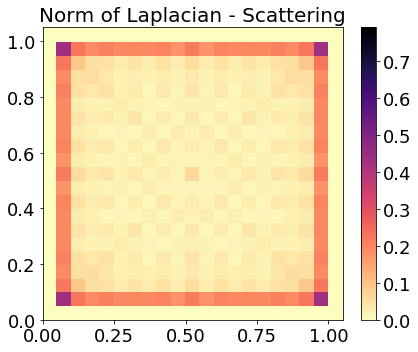

In [41]:
fig,ax = plt.subplots()
fig.set_size_inches(6, 5)
ax.tick_params(labelsize=18)
c = ax.pcolormesh(x1[1:], y1[1:], Lap_norm, cmap='magma_r', vmin=np.min(Lap_norm), vmax=0.79)#np.max(Lap_norm))
plt.title('Norm of Laplacian - Scattering',fontsize=20)

fig.tight_layout()
cb=fig.colorbar(c, ax=ax)
cb.ax.tick_params(labelsize=18)
#colorbar.ax.tick_params(labelsize=14)
plt.show()

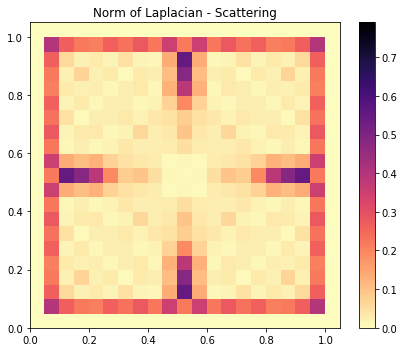

In [26]:
fig,ax = plt.subplots()
fig.set_size_inches(6, 5)
c = ax.pcolormesh(x1[1:], y1[1:], Lap_norm, cmap='magma_r', vmin=np.min(Lap_norm), vmax=0.79)#np.max(Lap_norm))
plt.title('Norm of Laplacian - Scattering')
fig.tight_layout()
fig.colorbar(c, ax=ax)
plt.show()

In [24]:
np.max(Lap_norm)

0.5551487803459167

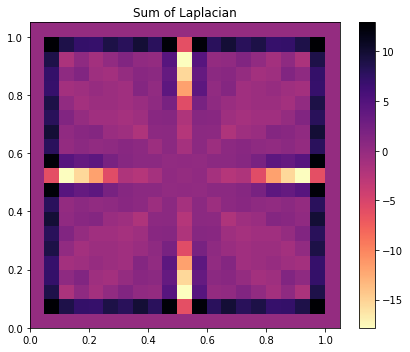

In [16]:
fig,ax = plt.subplots()
fig.set_size_inches(6, 5)
c = ax.pcolormesh(x1[1:], y1[1:], Lap_sum, cmap='magma_r', vmin=np.min(Lap_sum), vmax=np.max(Lap_sum))
plt.title('Sum of Laplacian')
fig.tight_layout()
fig.colorbar(c, ax=ax)
plt.show()

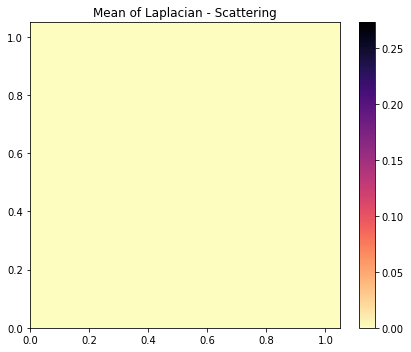

In [17]:
fig,ax = plt.subplots()
fig.set_size_inches(6, 5)
c = ax.pcolormesh(x1[1:], y1[1:], np.abs(Lap_mean), cmap='magma_r', vmin=0, vmax=0.273)
plt.title('Mean of Laplacian - Scattering')
fig.tight_layout()
fig.colorbar(c, ax=ax)
plt.show()